In [3]:
#Grandient Descent using NumPy
import numpy as np

# f = w*x
# f = 2*x

X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

#forwardpass
def forward(x):
    return w * x

#loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y) ** 2).mean()

#gradient
#MSE = 1/N * (w*x - y)**2
#dJ/dw = 1/N * 2x(w*x - y)
def gradient(x,y,y_predicted):
    return np.dot(2*x, y_predicted - y).mean()

print(forward(5))

#training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    y_pred = forward(X)
    
    l = loss(Y, y_pred)
    
    dw = gradient(X,Y,y_pred)
    
    w -= learning_rate * dw
print(forward(5))




0.0
9.999999976158142


In [ ]:
import torch 

# f = w*x
# f = 2*x

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad= True)

#forwardpass
def forward(x):
    return w * x

#loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y) ** 2).mean()



print(forward(5))

#training
learning_rate = 0.01
n_iters = 76

for epoch in range(n_iters):
    y_pred = forward(X)
    
    l = loss(Y, y_pred)
    
    #gradient = backwardpass
    l.backward()
    with torch.no_grad():
        w -= learning_rate * w.grad
    w.grad.zero_()
    
print(forward(5))

In [16]:
#trainig pipeline tutorial
# 1) training model(input, output size, forwardpass)
# 2) construct loss and optimizer
# 3) trainig pipeline
# - forwardpass - compute prediction
# - backwardpass - gradient
# - update weights

import torch

import torch.nn as nn

X = torch.tensor([[1], [2], [3], [4]], dtype= torch.float32)

Y = torch.tensor([[2], [4], [6], [8]], dtype= torch.float32)

X_test = torch.tensor([5], dtype= torch.float32)

n_sample, n_features = X.shape

print(n_sample, n_features)

input_size = n_features
output_size = n_features

model = nn.Linear(input_size , output_size)

print(model(X_test).item())

learning_rate = 0.01

n_iters = 500

loss = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(n_iters):
    y_pred = model(X)
    
    l = loss(Y, y_pred)
    
    l.backward()
    
    optimizer.step()
    
    optimizer.zero_grad()

print(model(X_test).item())



RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

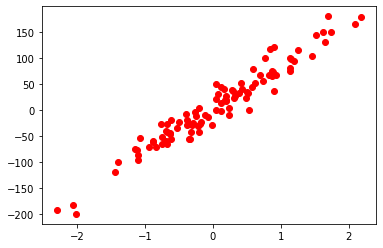

In [3]:
# 1) making model(input,output size, forwardpass)
# 2) Construct training loop and optimizer
# 3) Training Loop
# - forward pass : compute prediction and loss
# - backward pass : Gradient
# - update weights
import torch
import numpy as np
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) prepare data
x_numpy , y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 1)

X = torch.from_numpy(x_numpy.astype(np.float32))
Y = torch.from_numpy(y_numpy.astype(np.float32))

Y = Y.view(Y.shape[0], 1)

n_sample, n_features = X.shape

# 1) model

input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)


# 2) loss and optimizer

learning_rate = 0.1
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop  

num_iters = 100

for epochs in range(num_iters):
    y_predicted = model(X)
    loss = criterion(y_predicted, Y)
    
    loss.backward()
    optimizer.step()
    
    optimizer.zero_grad()
    
predicted = model(X).detach().numpy()

plt.plot(x_numpy , y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()
